# Ranking of nodes

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin import DPAH
from netin import PAH
from netin import viz
from netin import stats

## Helpers

In [2]:
def get_title(df, f_m, h_MM, h_mm):
    g = [r"f$_{m}$=<fm>".replace("<fm>",f"{f_m}")]
    if h_MM == h_mm:
        s = r"h$_{MM}$=h$_{mm}$=<h>".replace("<h>",f"{h_MM}")
    else:
        s = r"h$_{MM}$>h$_{mm}$" if h_MM > h_mm else r"h$_{MM}$<h$_{mm}$"
    g.append(s)
    
    return f"{df.name}\n{', '.join(g)}"

def create_pah(n, f_m, k, h_MM, h_mm, seed):
    g = PAH(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
    g.generate()
    df = g.get_node_metadata_as_dataframe(include_graph_metadata=True)
    df.name = get_title(df, f_m, h_MM, h_mm)
    return df

def create_dpah(n, f_m, d, h_MM, h_mm, plo_M, plo_m, seed):
    g = DPAH(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
    g.generate()
    df = g.get_node_metadata_as_dataframe(include_graph_metadata=True)
    df.name = get_title(df, f_m, h_MM, h_mm)
    return df

## Generating balanced graphs

In [3]:
n = 500
f_m = 0.5
k = 2
d = 0.005
plo_M = 2.0
plo_m = 2.0
seed = 9876

node_metadata_balance_pah = []
node_metadata_balance_dpah = []

### Neutral

In [4]:
h_MM = 0.5
h_mm = 0.5

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_balance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_balance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Homophilic

In [5]:
h_MM = 0.9
h_mm = 0.9

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_balance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_balance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Heterophilic

In [6]:
h_MM = 0.1
h_mm = 0.1

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_balance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_balance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Mixed $(h_{MM} > h_{mm})$

In [7]:
h_MM = 0.9
h_mm = 0.1

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_balance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_balance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Mixed $(h_{mm} > h_{MM})$

In [8]:
h_MM = 0.1
h_mm = 0.9

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_balance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_balance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

## Generating unbalanced graphs

In [9]:
f_m = 0.2

node_metadata_unbalance_pah = []
node_metadata_unbalance_dpah = []

### Neutral

In [10]:
h_MM = 0.5
h_mm = 0.5

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_unbalance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_unbalance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Homophilic

In [11]:
h_MM = 0.9
h_mm = 0.9

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_unbalance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_unbalance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Heterophilic

In [12]:
h_MM = 0.1
h_mm = 0.1

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_unbalance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_unbalance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Mixed $(h_{MM} > h_{mm})$

In [13]:
h_MM = 0.9
h_mm = 0.1

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_unbalance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_unbalance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### Mixed $(h_{mm} > h_{MM})$

In [14]:
h_MM = 0.1
h_mm = 0.9

# pah
df = create_pah(n=n, f_m=f_m, k=k, h_MM=h_MM, h_mm=h_mm, seed=seed)
node_metadata_unbalance_pah.append(df)

#daph
df = create_dpah(n=n, d=d, f_m=f_m, h_MM=h_MM, h_mm=h_mm, plo_M=plo_M, plo_m=plo_m, seed=seed)
node_metadata_unbalance_dpah.append(df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

## Plots

In [15]:
viz.reset_style()
viz.set_paper_style()

### Inequity
Fraction of minority in top-k

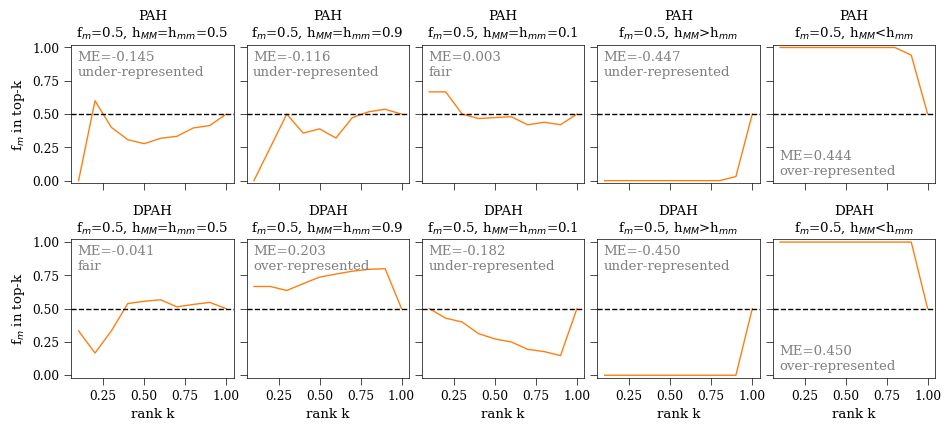

In [16]:
# Comparing the effect of preferential attachment on balance graphs

combined_data = node_metadata_balance_pah.copy()
combined_data.extend(node_metadata_balance_dpah)
combined_metric = ['degree' if df.degree.dtype==int else 'in_degree' for df in combined_data]

viz.plot_fraction_of_minority(combined_data, 
                              x=combined_metric, 
                              sharex=True, sharey=True,
                              nc=5, wspace=0.08, cell_size=(1.9,2.2))

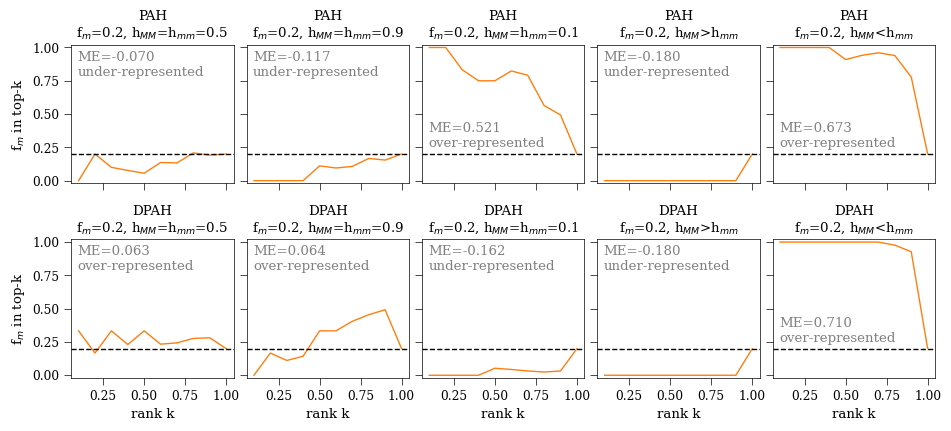

In [17]:
# Comparing the effect of preferential attachment on unbalance graphs

combined_data = node_metadata_unbalance_pah.copy()
combined_data.extend(node_metadata_unbalance_dpah)
combined_metric = ['degree' if df.degree.dtype==int else 'in_degree' for df in combined_data]

viz.plot_fraction_of_minority(combined_data, 
                              x=combined_metric, 
                              sharex=True, sharey=True,
                              nc=5, wspace=0.08, cell_size=(1.9,2.2))

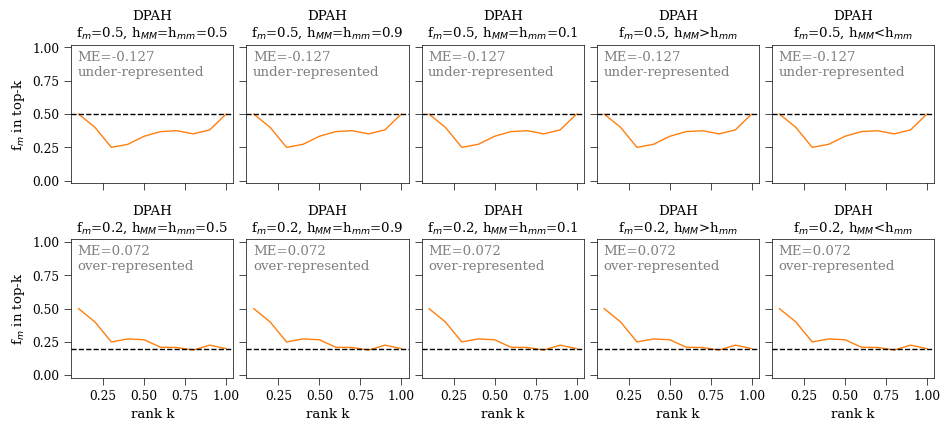

In [18]:
# comparing between balanced and unbalanced across directed graphs
combined_data = node_metadata_balance_dpah.copy()
combined_data.extend(node_metadata_unbalance_dpah)

viz.plot_fraction_of_minority(combined_data, 
                              x='out_degree', 
                              sharex=True, sharey=True,
                              nc=5, wspace=0.08, cell_size=(1.9,2.2))

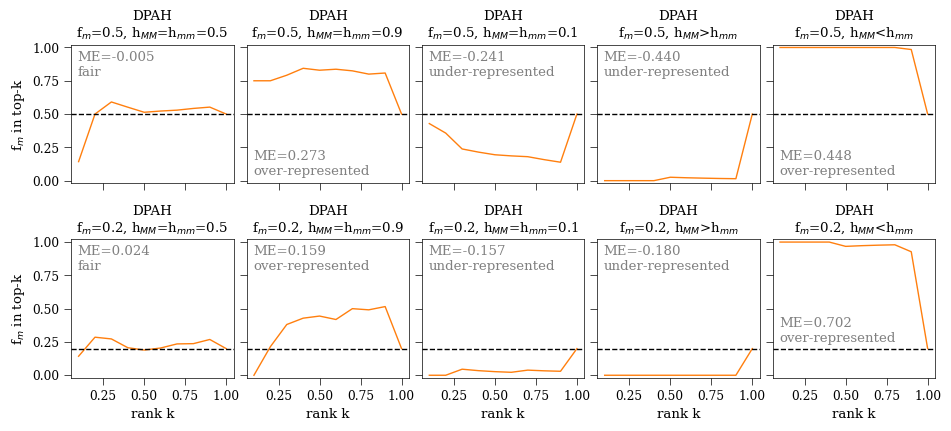

In [19]:
# comparing between balanced and unbalanced across directed graphs
combined_data = node_metadata_balance_dpah.copy()
combined_data.extend(node_metadata_unbalance_dpah)

viz.plot_fraction_of_minority(combined_data, 
                              x='pagerank', 
                              sharex=True, sharey=True,
                              nc=5, wspace=0.08, cell_size=(1.9,2.2))

### Inequality
Gini coefficient of distribution

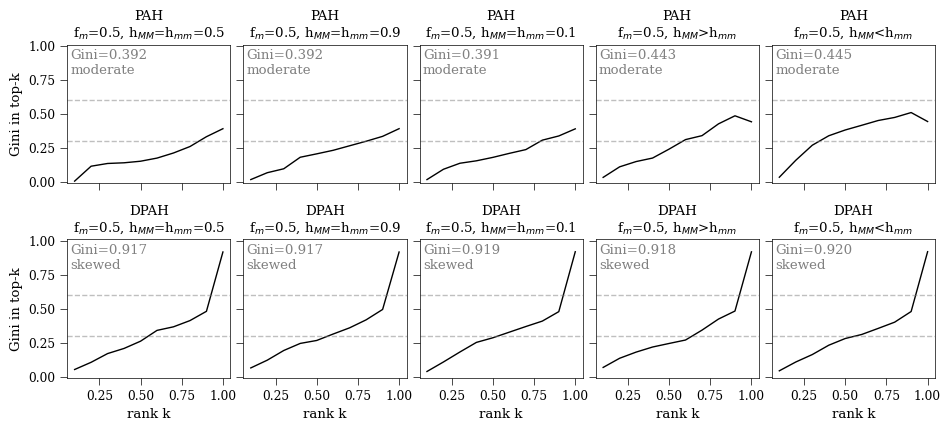

In [20]:
# Comparing the effect of preferential attachment on balance graphs

combined_data = node_metadata_balance_pah.copy()
combined_data.extend(node_metadata_balance_dpah)
combined_metric = ['degree' if df.degree.dtype==int else 'in_degree' for df in combined_data]

viz.plot_gini_coefficient(combined_data, 
                          x=combined_metric, 
                          sharex=True, sharey=True,
                          nc=5, wspace=0.08, cell_size=(1.9,2.2))

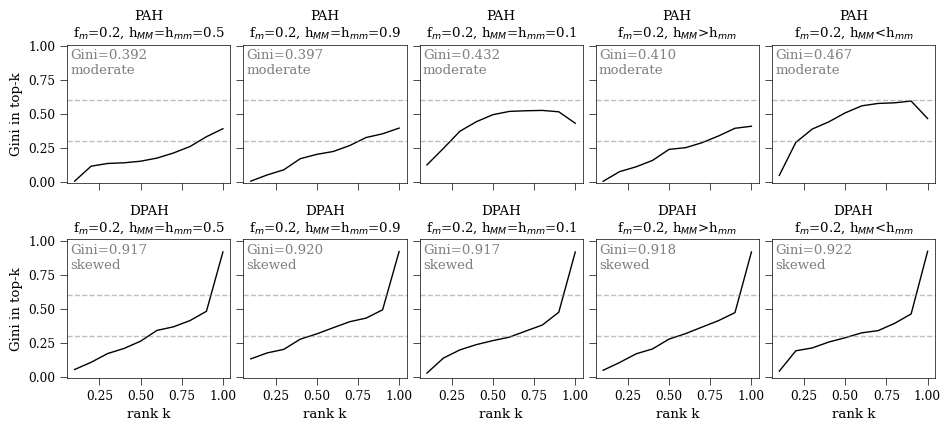

In [21]:
# Comparing the effect of preferential attachment on unbalance graphs

combined_data = node_metadata_unbalance_pah.copy()
combined_data.extend(node_metadata_unbalance_dpah)
combined_metric = ['degree' if df.degree.dtype==int else 'in_degree' for df in combined_data]

viz.plot_gini_coefficient(combined_data, 
                          x=combined_metric, 
                          sharex=True, sharey=True,
                          nc=5, wspace=0.08, cell_size=(1.9,2.2))

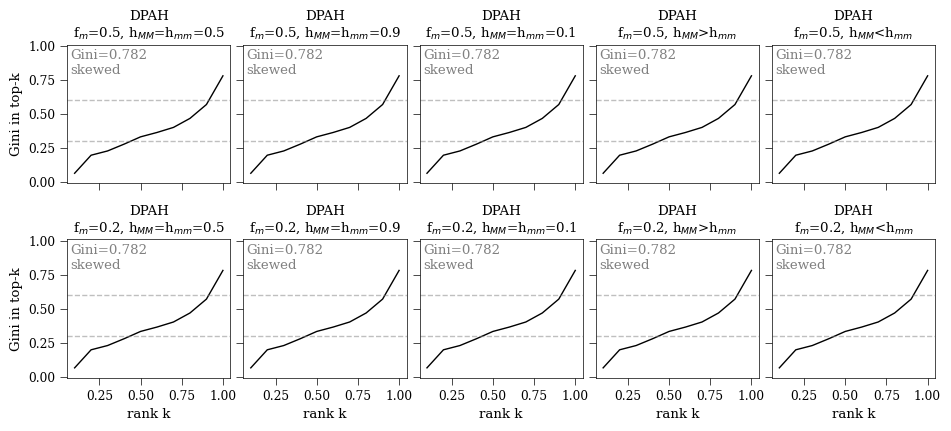

In [22]:
# comparing between balanced and unbalanced across directed graphs
combined_data = node_metadata_balance_dpah.copy()
combined_data.extend(node_metadata_unbalance_dpah)

viz.plot_gini_coefficient(combined_data, 
                          x='out_degree', 
                          sharex=True, sharey=True,
                          nc=5, wspace=0.08, cell_size=(1.9,2.2))

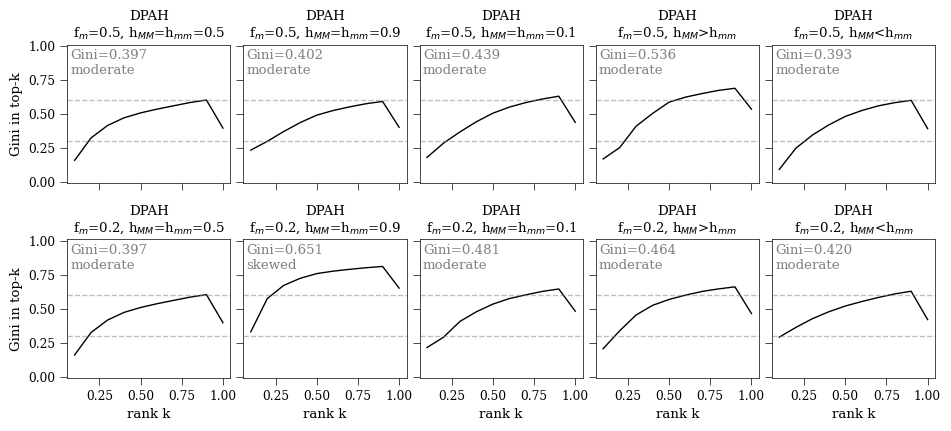

In [23]:
# comparing between balanced and unbalanced across directed graphs
combined_data = node_metadata_balance_dpah.copy()
combined_data.extend(node_metadata_unbalance_dpah)

viz.plot_gini_coefficient(combined_data, 
                          x='pagerank', 
                          sharex=True, sharey=True,
                          nc=5, wspace=0.08, cell_size=(1.9,2.2))

### Inequity vs Inequality
Fraction of minority vs Gini coefficient of distribution

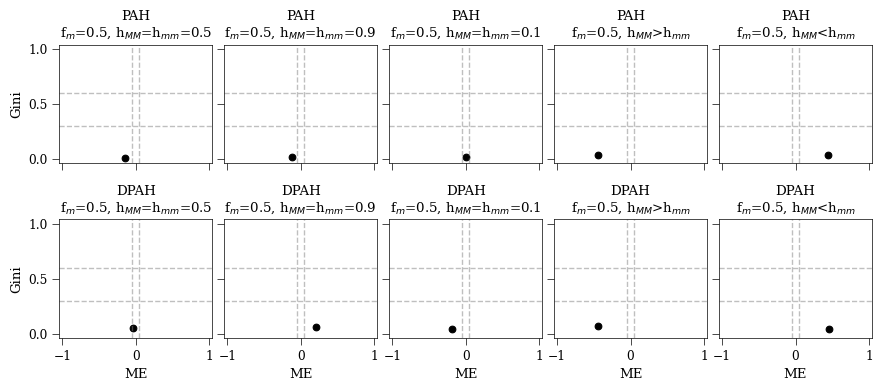

In [24]:
# Comparing the effect of preferential attachment on balance graphs

combined_data = node_metadata_balance_pah.copy()
combined_data.extend(node_metadata_balance_dpah)
combined_metric = ['degree' if df.degree.dtype==int else 'in_degree' for df in combined_data]

viz.plot_disparity(combined_data, 
                   x=combined_metric, 
                   sharex=True, sharey=True,
                   nc=5, wspace=0.08, cell_size=(1.8,2.))

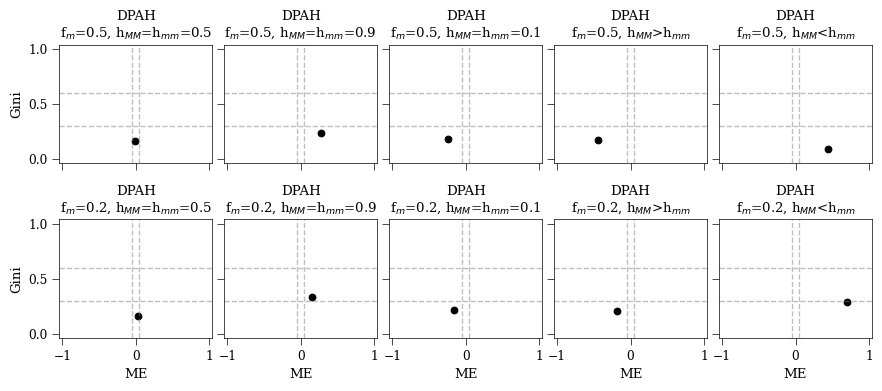

In [25]:
# comparing between balanced and unbalanced across directed graphs
combined_data = node_metadata_balance_dpah.copy()
combined_data.extend(node_metadata_unbalance_dpah)

viz.plot_disparity(combined_data, 
                   x='pagerank', 
                   sharex=True, sharey=True,
                   nc=5, wspace=0.08, cell_size=(1.8,2.))